<a href="https://colab.research.google.com/github/IMI1998/Walmart_Sales_Forecasting/blob/main/Walmart_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!pip install plotly
!pip install seaborn

In [60]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [13]:
train_df = pd.read_csv('/content/train.csv')
features_df = pd.read_csv('/content/features.csv')
stores_df = pd.read_csv('/content/stores.csv')
test_df = pd.read_csv('/content/test.csv')

In [14]:
train_df.head()


Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [15]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [16]:
features_df.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [17]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [18]:
stores_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [19]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [24]:
labels = stores_df["Type"].value_counts()[:10].index
values = stores_df["Type"].value_counts()[:10].values

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
          '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']


fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

In [ ]:
dataset = features_df.merge(stores_df, how='inner', on='Store')
dataset.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type  \
0        NaN        NaN        NaN  211.096358         8.106      False    A   
1        NaN        NaN        NaN  211.242170         8.106       True    A   
2        NaN        NaN        NaN  211.289143         8.106      False    A   
3        NaN        NaN        NaN  211.319643         8.106      False    A   
4        NaN        NaN        NaN  211.350143         8.106      False    A   

     Size  
0  151315  
1  151315  
2  151315  
3  151315  
4  151315

In [25]:
labels = train_df["Dept"].value_counts()[:10].index  # Taking the top 10 index
values = train_df["Dept"].value_counts()[:10].values  # Taking the top 10 values

colors=train_df["Dept"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

In [26]:
labels = train_df["Store"].value_counts()[:10].index  # Taking the top 10 index
values = train_df["Store"].value_counts()[:10].values  # Taking the top 10 values

colors=train_df["Store"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

In [27]:
labels = train_df['IsHoliday'].value_counts().index # Taking the all index
values = train_df['IsHoliday'].value_counts().values  # Taking the all values

colors=train_df['IsHoliday']

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

In [42]:
!pip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 7.8 MB/s eta 0:00:00


In [31]:
from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [52]:

 dataset['Week'] = dataset['Date'].dt.isocalendar().week
dataset['Year'] = dataset.Date.dt.year # for the year data

In [53]:
print(dataset)

      Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1 2010-02-05        42.31       2.572        NaN        NaN   
1         1 2010-02-12        38.51       2.548        NaN        NaN   
2         1 2010-02-19        39.93       2.514        NaN        NaN   
3         1 2010-02-26        46.63       2.561        NaN        NaN   
4         1 2010-03-05        46.50       2.625        NaN        NaN   
...     ...        ...          ...         ...        ...        ...   
8185     45 2013-06-28        76.05       3.639    4842.29     975.03   
8186     45 2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45 2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45 2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45 2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
0           NaN        NaN        NaN  211.09

In [54]:
train_merge = train_df.merge(dataset, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [55]:
test_merge = test_df.merge(dataset, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [56]:
def scatter(train_merge, column):
    plt.figure()
    plt.scatter(train_merge[column] , train_merge['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

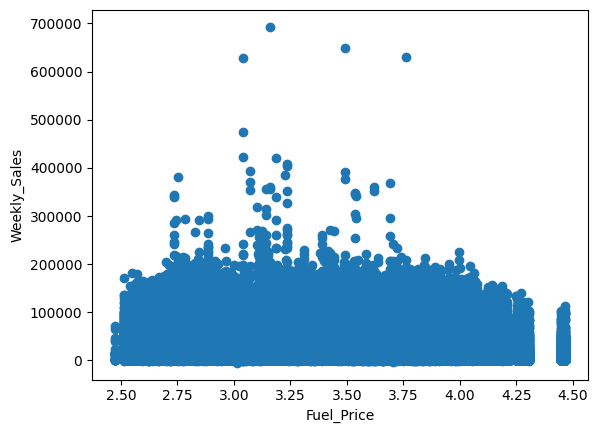

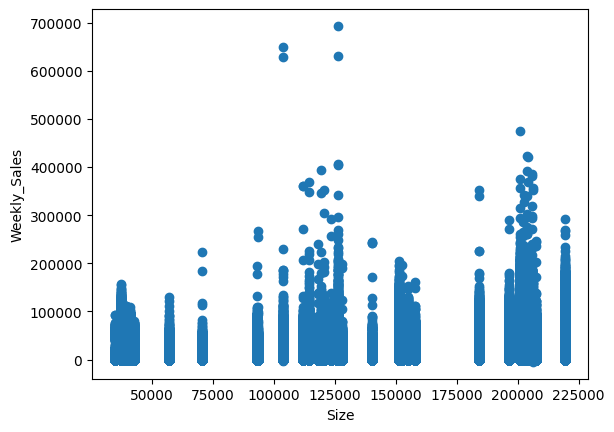

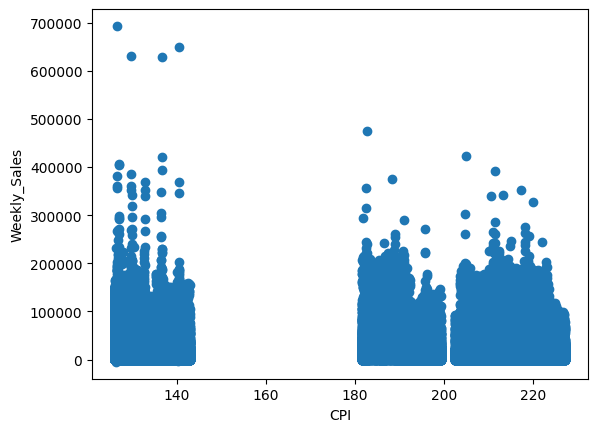

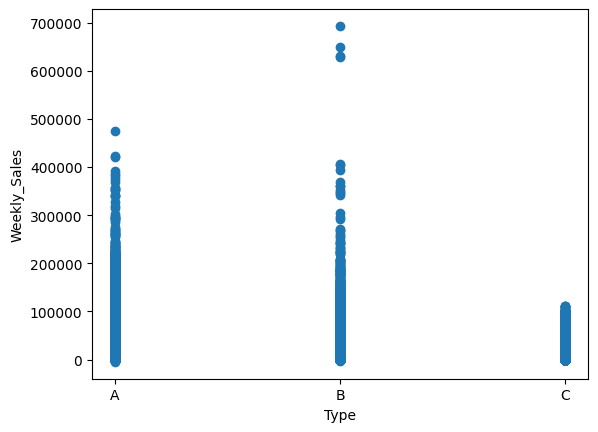

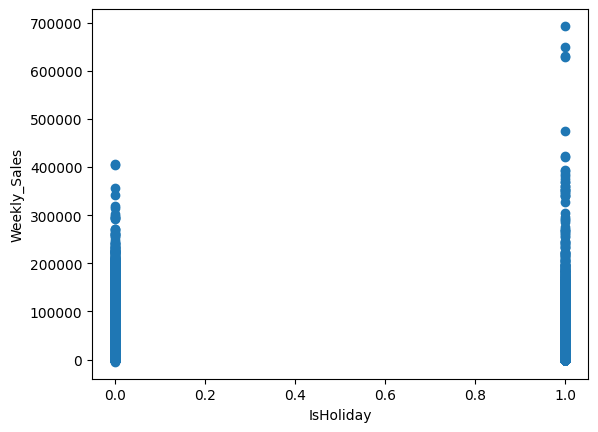

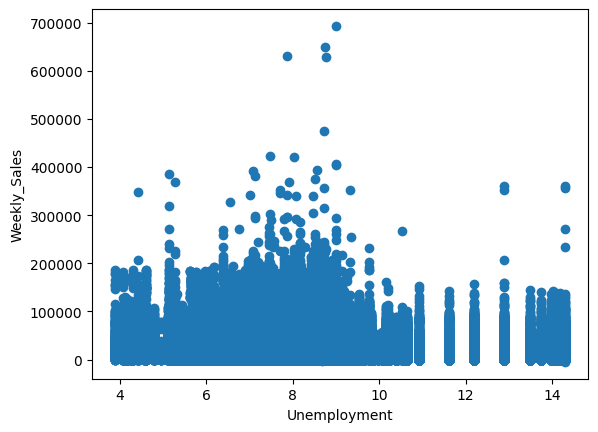

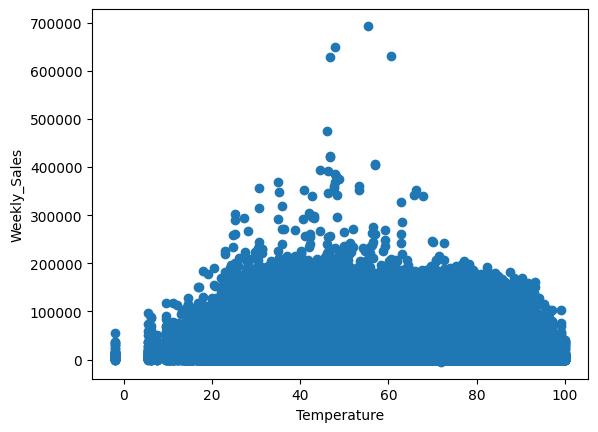

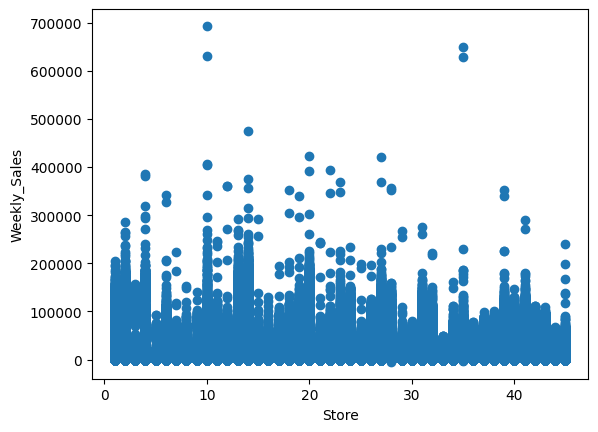

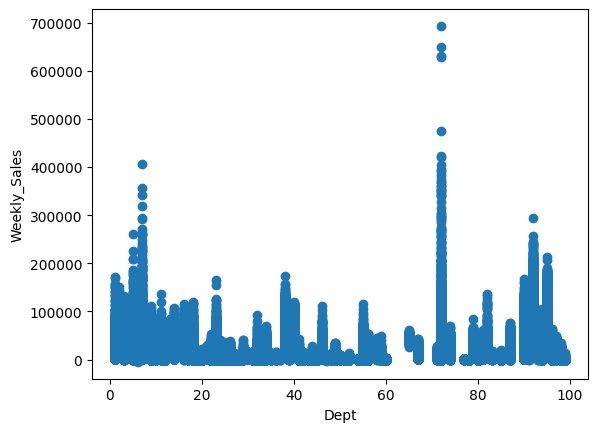

In [57]:
scatter(train_merge, 'Fuel_Price')
scatter(train_merge, 'Size')
scatter(train_merge, 'CPI')
scatter(train_merge, 'Type')
scatter(train_merge, 'IsHoliday')
scatter(train_merge, 'Unemployment')
scatter(train_merge, 'Temperature')
scatter(train_merge, 'Store')
scatter(train_merge, 'Dept')

<Axes: >

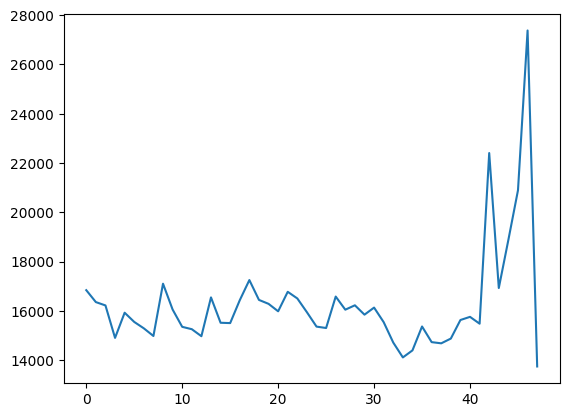

In [62]:
weekly_sales_2010 = train_merge[train_merge['Year']==2010]['Weekly_Sales'].groupby(train_merge['Week']).mean()

sns.lineplot( weekly_sales_2010.values)

<Axes: >

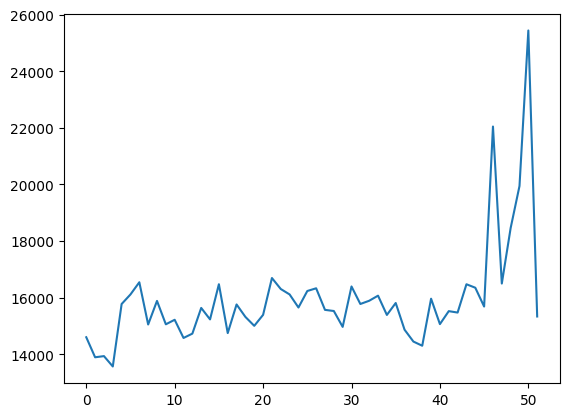

In [64]:
weekly_sales_2011 = train_merge[train_merge['Year']==2011]['Weekly_Sales'].groupby(train_merge['Week']).mean()

sns.lineplot( weekly_sales_2011.values)

<Axes: >

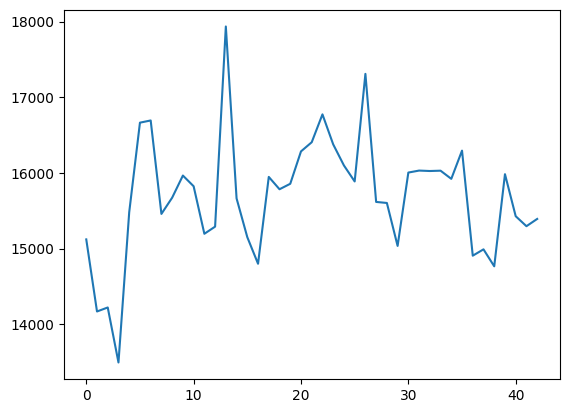

In [65]:
weekly_sales_2012 = train_merge[train_merge['Year']==2012]['Weekly_Sales'].groupby(train_merge['Week']).mean()

sns.lineplot( weekly_sales_2012.values)

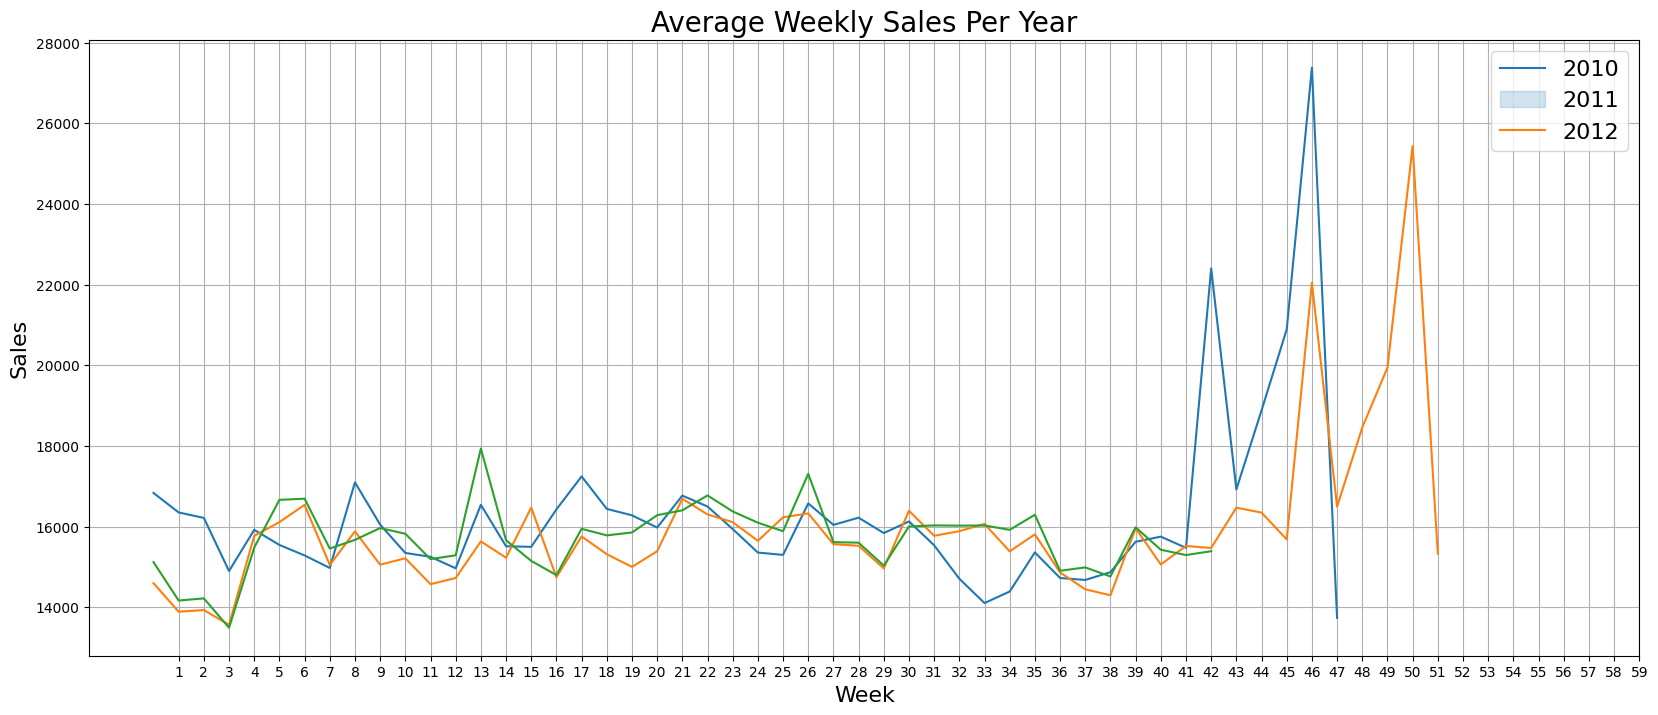

In [67]:
plt.figure(figsize=(20,8))
sns.lineplot( weekly_sales_2010.values)
sns.lineplot( weekly_sales_2011.values)
sns.lineplot( weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,60, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

<ipython-input-68-acb41cc8fbac>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




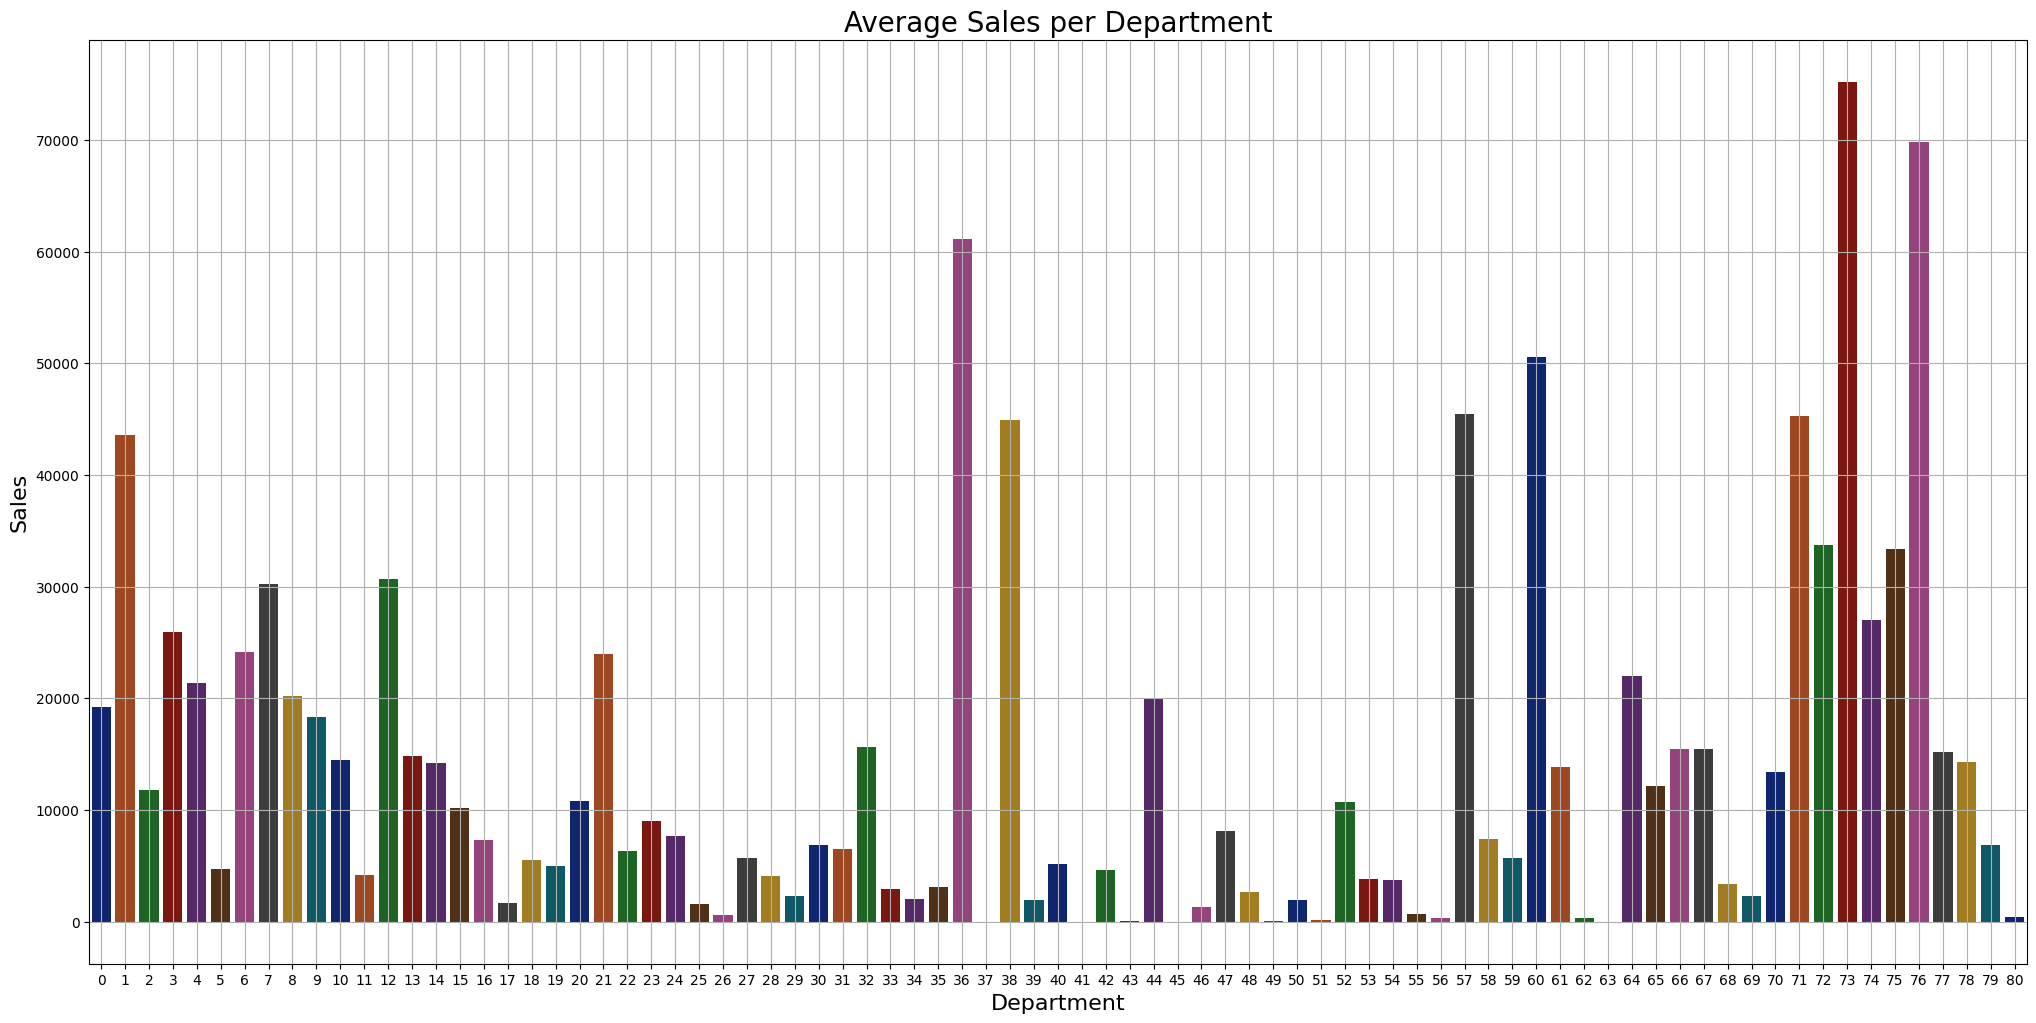

In [68]:
weekly_sales = train_merge['Weekly_Sales'].groupby(train_merge['Dept']).mean()
plt.figure(figsize=(25,12))
sns.barplot( weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Department', fontsize=20)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

<ipython-input-69-300af82457c4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




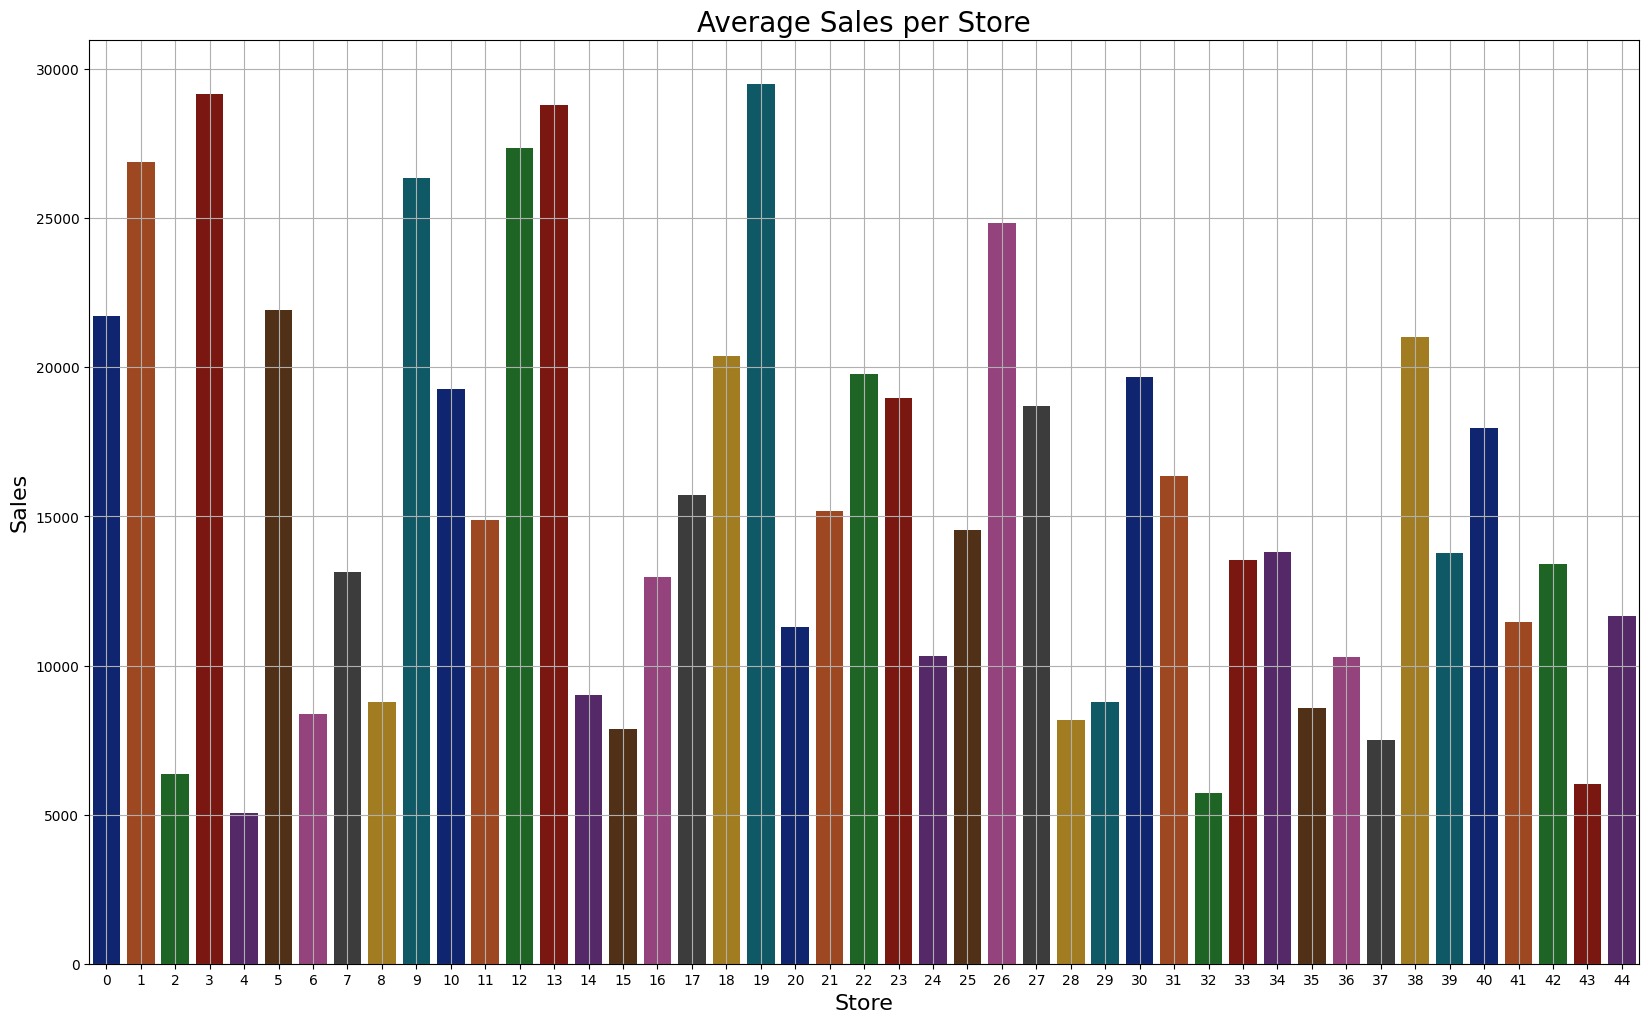

In [69]:
weekly_sales = train_merge['Weekly_Sales'].groupby(train_merge['Store']).mean()
plt.figure(figsize=(20,12))
sns.barplot( weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Store', fontsize=20)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_merge['Type']=le.fit_transform(train_merge['Type'])

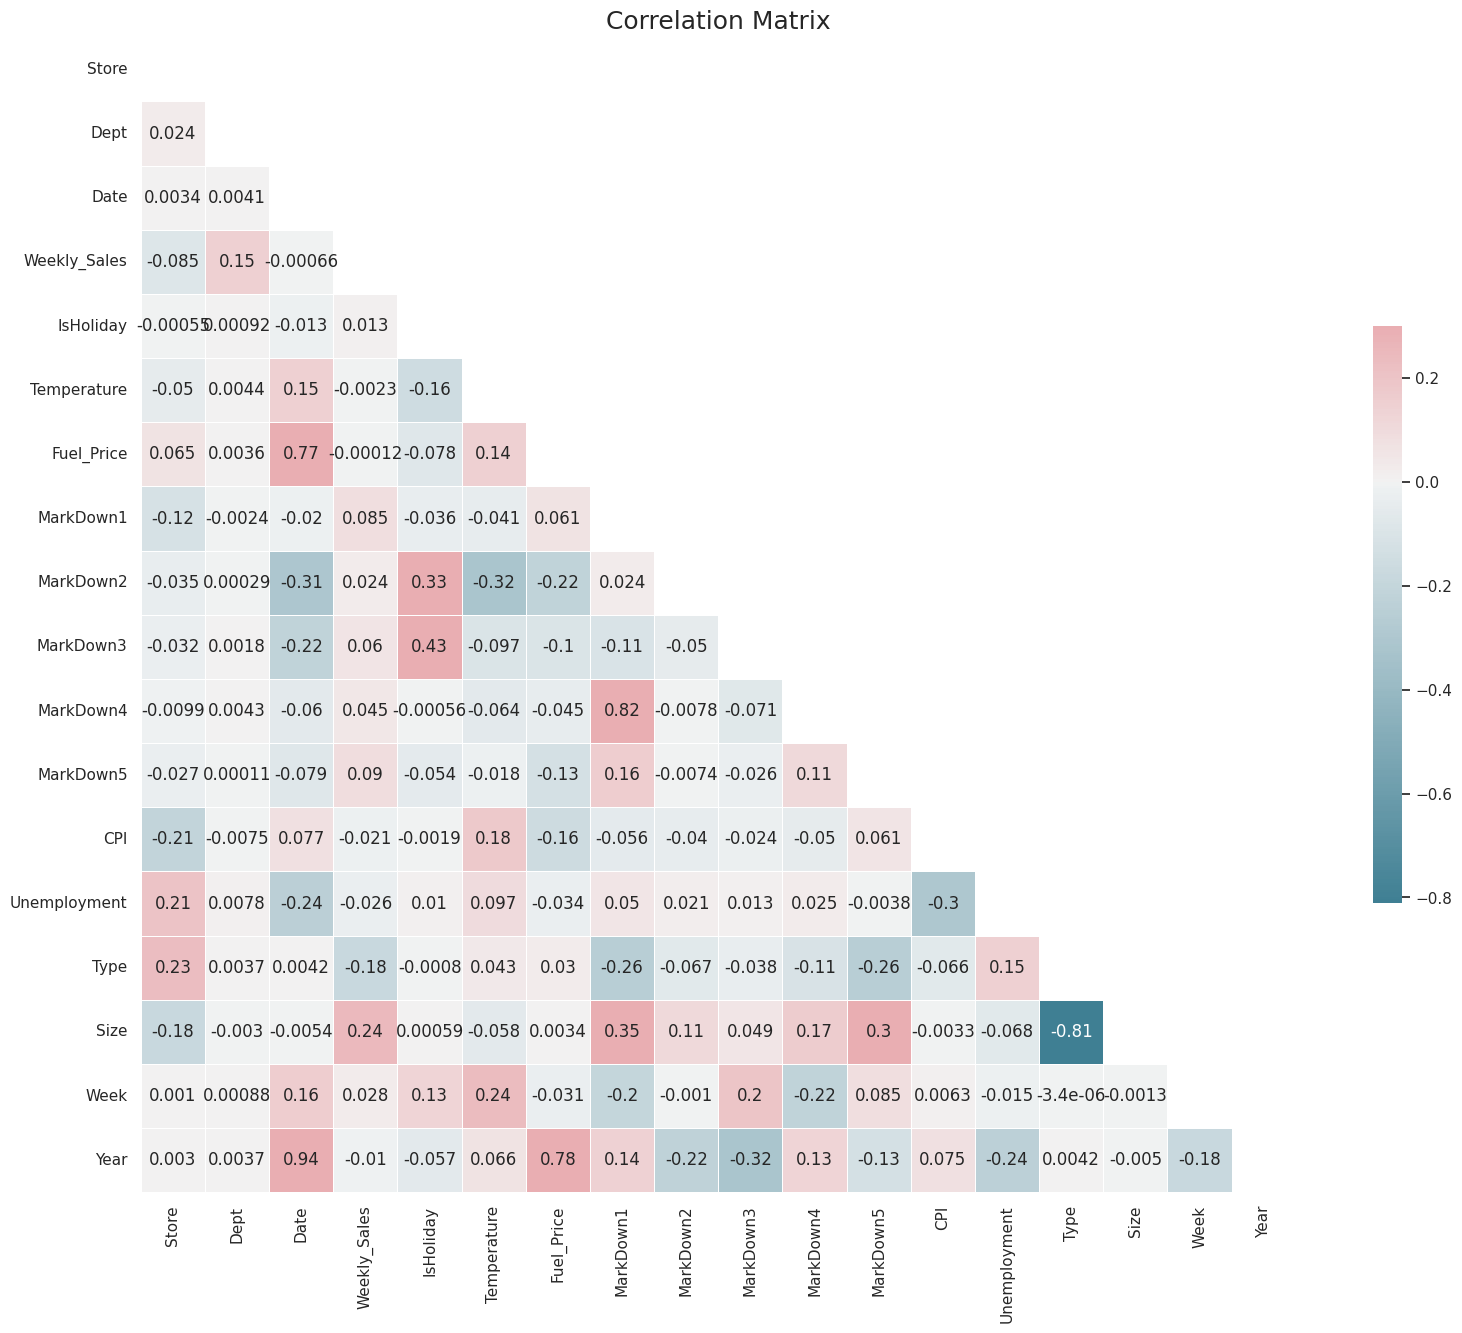

In [81]:
sns.set(style = "white")

corr = train_merge.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [82]:
train_merge = train_merge.drop(columns=['Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_merge = test_merge.drop(columns=['Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

In [83]:
X = train_merge[['Store','Dept','IsHoliday','Size','Week','Year']]
y = train_merge['Weekly_Sales']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [85]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 7, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [86]:
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)

In [87]:
print("Train Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
Root Mean Squared Error:  21696.189989134735
R-Squared:  0.08442134387348998


In [88]:
print("Test Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test.values, y_test_pred)))
print("R-Squared: ", r2_score(y_test.values, y_test_pred))

Test Results for Ridge Regressor Model:
Root Mean Squared Error:  21811.998658223216
R-Squared:  0.08452464107207469


In [90]:
from sklearn.tree import DecisionTreeRegressor
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [91]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  1364.889554410556
R-Squared:  0.9963765378458533


In [93]:
from sklearn.ensemble import RandomForestRegressor
tuned_params = {'n_estimators': [100, 200], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 3, scoring = 'neg_mean_absolute_error', cv = 3, n_jobs = -1)
random_regressor.fit(X_train, y_train)

y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

print("Train Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
Root Mean Squared Error:  2159.6491557840004
R-Squared:  0.9909281655304321
